<a href="https://colab.research.google.com/github/rebecadieb/mmq_nlp/blob/main/C%C3%B3pia_de_testes_iniciais_dissertacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
from typing import List
import nltk
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
# import stanfordnlp

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
2023-05-18 06:32:37.798719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 06:32:38.978286: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2-models-english.jar
!unzip /content/stanford-corenlp-4.2.2.zip

--2023-05-18 06:33:19--  https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip [following]
--2023-05-18 06:33:19--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 504278711 (481M) [application/zip]
Saving to: ‘stanford-corenlp-4.2.2.zip’

stanford-corenlp-4. 100%[===================>] 480.92M  5.04MB/s    in 92s     

2023-05-18 06:34:52 (5.22 MB/s) - ‘stanford-corenlp-4.2.2.zip’ saved [504278711/504278711]

--2023-05-18 06:34:52--  https://nlp.st

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dependency parser

### Spacy

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm") # modelo

sentence = "I have ipod and it great buy but I am probably the only person that dislikes the itunes software"

doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in doc:
  print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})


Token           | Relation | Head            | Children            
----------------------------------------------------------------------
I               | nsubj    | have            | []                  
have            | ROOT     | have            | [I, ipod]           
ipod            | punct    | have            | []                  
and             | cc       | buy             | []                  
it              | nsubj    | buy             | []                  
great           | amod     | buy             | []                  
buy             | ROOT     | buy             | [and, it, great]    
but             | cc       | am              | []                  
I               | nsubj    | am              | []                  
am              | ROOT     | am              | [but, I, probably, person]
probably        | advmod   | am              | []                  
the             | det      | person          | []                  
only            | amod     | person    

Relações existentes
* nsubj
* punct
* cc
* amod
* advmod
* attr
* det
* relcl
* dative
* dobj


### NLTK

In [ ]:
from nltk.parse.stanford import StanfordDependencyParser

In [ ]:
# Path to CoreNLP jar unzipped
jar_path = '/content/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'

# Path to CoreNLP model jar
models_jar_path = '/content/stanford-corenlp-4.2.2-models-english.jar'

sentence =  "I have ipod and it great buy but I am probably the only person that dislikes the itunes software"

# Initialize StanfordDependency Parser from the path
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)

# Parse the sentence
result = parser.raw_parse(sentence)
dependency = result.__next__()


print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print ("-" * 75)
  
# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))  
for dep in list(dependency.triples()):
  print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))

<ipython-input-7-e78c0e8e4d91>:10: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)


Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
ipod            | VBN        | nsubj      | I               | PRP       
ipod            | VBN        | aux        | have            | VBP       
ipod            | VBN        | conj       | buy             | VBP       
buy             | VBP        | cc         | and             | CC        
buy             | VBP        | nsubj      | it              | PRP       
buy             | VBP        | advmod     | great           | RB        
buy             | VBP        | conj       | person          | NN        
person          | NN         | cc         | but             | CC        
person          | NN         | nsubj      | I               | PRP       
person          | NN         | cop        | am              | VBP       
person          | NN         | advmod     | probably        | RB        
person          | NN         | det        | t

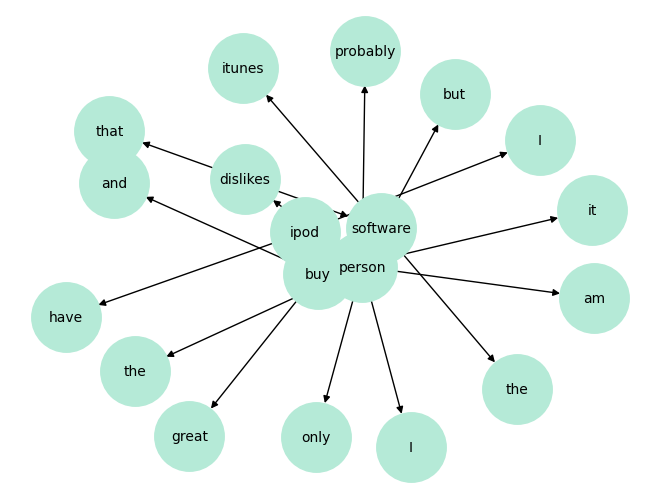

In [ ]:
# importing networkx
import networkx as nx
import matplotlib.pyplot as plt
# Using reverse() to reverse the direction of edges as nx_graph() returns inverted edges
G = dependency.nx_graph().reverse()
# nx_graph() returns numeric node labels starting from 1
# Create a dictionary to map numeric nodes and words in the sentence
words = sentence.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}
nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)

In [ ]:
from graphviz import Source
dot_def = dependency.to_dot()
'''
The below lines require graphviz executables to be installed to your system. If that does not work, print the dot_def object and paste the output on http://graphs.grevian.org/graph/
'''
source = Source(dot_def, filename="dependency_graph", format="png")
source.view()

'dependency_graph.png'

## Algoritmo

In [ ]:
sentence = "I have an ipod and it is a great buy but I’m probably the only person that dislikes the itunes software"
S = sentence.split()
S

['I',
 'have',
 'an',
 'ipod',
 'and',
 'it',
 'is',
 'a',
 'great',
 'buy',
 'but',
 'I’m',
 'probably',
 'the',
 'only',
 'person',
 'that',
 'dislikes',
 'the',
 'itunes',
 'software']

In [ ]:
# Create the graph
G = nx.Graph()

# Add the edges to the graph
G.add_edge('word5', 'f1')
G.add_edge('word5', 'f2')
G.add_edge('word5', 'f4')
G.add_edge('word6', 'f1')
G.add_edge('word6', 'f2')

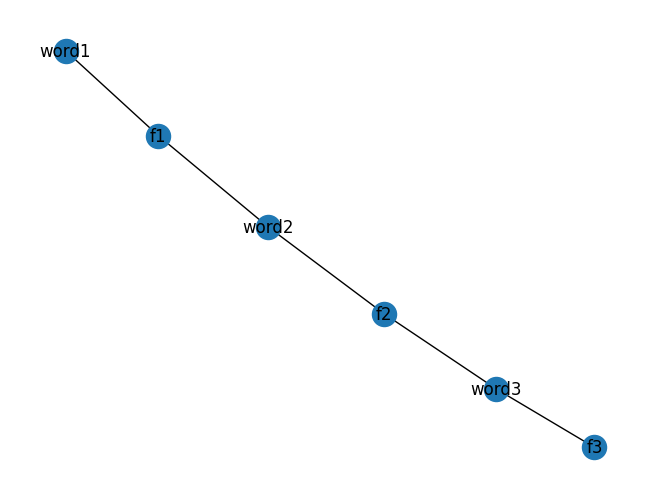

In [ ]:
# create graph
G = nx.Graph()
G.add_nodes_from(['word1', 'word2', 'word3', 'f1', 'f2', 'f3'])
G.add_edges_from([('word1', 'f1'), ('word2', 'f1'), ('word2', 'f2'), ('word3', 'f2'), ('word3', 'f3')])

# draw graph
nx.draw(G, with_labels=True)
plt.show()

**Exemplo:** 

* S = "I have an ipod and it is a great buy but I’m probably the only person that dislikes the itunes software" -> sentença
* F = {ipod, buy, person, software} -> conjunto inicial de features
* ft = "ipod" -> feature alvo
* os vértices do gráfico são formados por todas as palavras de S
* as palavras são conectadas pelas relações definidas pelo conjunto R (dependency parser)
* O cluster alvo Ct tem o centroide ft.
* {I, have, it} está mais próximo de ipod e está atribuído ao cluster correspondente, enquanto que {great, probably, but, im} está mais próximo de buy e foi atribuído ao cluster correspondente. ipod e buy foram relacionados e como a distância entre eles é 2, que é menor que o threshold = 3, serão meclados em um único cluster
* 

In [ ]:
# Define the set of all features
F = ['f1', 'f2', 'f3', 'f4']

# Define the target feature
ft = 'f1'

# Define the set of words
S = ['word1', 'word2', 'word3', 'word4', 'word5', 'word6']

# Create the graph
G = nx.Graph()

# Add the edges to the graph
G.add_edge('word1', 'f2')
G.add_edge('word1', 'f3')
G.add_edge('word2', 'f2')
G.add_edge('word2', 'f3')
G.add_edge('word2', 'f4')
G.add_edge('word3', 'f4')
G.add_edge('word4', 'f1')
G.add_edge('word4', 'f3')
G.add_edge('word4', 'f4')
G.add_edge('word5', 'f1')
G.add_edge('word5', 'f2')
G.add_edge('word5', 'f4')
G.add_edge('word6', 'f1')
G.add_edge('word6', 'f2')

# Initialize n clusters Ci
n = len(F)
clusters = {}
for i in range(1, n+1):
    clusters[i] = set()
    clusters[i].add(F[i-1])

# Set the target feature ft as the clusterhead of Ct
Ct = set()
Ct.add(ft)

# Assign each word to a cluster
for wj in S:
    min_dist = float('inf')
    min_cluster = None
    for i in range(1, n+1):
        dist = nx.shortest_path_length(G, wj, F[i-1])
        if dist < min_dist:
            min_dist = dist
            min_cluster = i
    clusters[min_cluster].add(wj)

# Merge any cluster Ci with Ct if dist(fi, ft) < theta
theta = 2
for i in range(1, n+1):
    fi = F[i-1]
    if nx.has_path(G, fi, ft) and nx.shortest_path_length(G, fi, ft) < theta:
        Ct = Ct.union(clusters[i])

# The set of words wi ∈ Ct gives the opinion expression regarding the target feature ft
opinion_expression = []
for w in S:
    if w in Ct:
        opinion_expression.append(w)

print(opinion_expression)

['word4', 'word5', 'word6']
